<a href="https://colab.research.google.com/github/Lissiu/scNET/blob/main/%E2%80%9C%E2%80%9CscNET_protein_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

**Install scnet using pip**

**It may be necessary to restart (not delete) the runtime after installing scNET in Google Colab. We are working on fixing this issue in future releases.**

In [1]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 785.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56

# Import scNET and model traning

In [1]:
import scNET
import scanpy as sc

#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

#For GPU with 24GB memory
#scNET.main.MAX_CELLS_BATCH_SIZE = 3000

#for GPU with 40GB memory
#scNET.main.MAX_CELLS_BATCH_SIZE = 4000

#For GPU with 80GB memory or more
#scNET.main.MAX_CELLS_BATCH_SIZE = 8000

#otherwize, do not change the default value

In [2]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.05

In [3]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 2

In [4]:
#To control the number of deifferentially expressed genes, the default value is 2000
#For example, to consider 3500 DE genes
scNET.main.DE_GENES_NUM = 1500


In [5]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.0.1
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ e

## run_scNET arguments:
 **obj (AnnData, optional):** AnnData obj.

  **pre_processing_flag (bool, optional):** If True, perform pre-processing steps.

  **human_flag (bool, optional):** Controls gene name casing in the network.

  **number_of_batches (int, optional):** Number of mini-batches for the training.

  **split_cells (bool, optional):** If True, split by cells instead of edges during training. If using A100 could be True (for 10K cells or less)

  **n_neighbors (int, optional):** Number of neighbors for building the adjacency graph.

  **max_epoch (int, optional):** Max number of epochs for model training (recommended 250-300, and for larger dataset consider also 300-350).

  **model_name (str, optional):** Identifier for saving the model outputs.
  
  **save_model_flag (bool, optional):** If True, save the trained model.

In [10]:
import pandas as pd
import numpy as np

# ===== 1. 读原始 TS_SCP 文件 =====
ts_file = "1_20240824_TS_SCP_filtered.txt"  # 如果路径不一样改这里
df = pd.read_csv(ts_file, sep="\t")

print("原始形状:", df.shape)
print("前几列:\n", df.columns[:8])

# ===== 2. 找出表达列（.d 结尾的列就是每个单细胞） =====
expr_cols = [c for c in df.columns if c.endswith(".d")]
print("检测到的细胞数量:", len(expr_cols))

# ===== 3. 去掉没有基因名的行 =====
df = df[~df["Genes"].isna()].copy()

# ===== 4. 处理一行多个基因的情况 =====
# 例： "GATD3;GATD3B" -> 只取第一个 GATD3 作为主基因
df["gene_primary"] = (
    df["Genes"]
      .astype(str)
      .str.split(";")
      .str[0]
      .str.strip()
)

df = df[df["gene_primary"] != ""].copy()
print("有主基因名的行数:", df.shape[0])

# ===== 5. 一个基因可能对应多个 protein group：按 max 合并到一个基因 =====
expr_gene = (
    df.groupby("gene_primary")[expr_cols]
      .max()
)

print("按基因聚合后的矩阵形状 (基因 × 细胞):", expr_gene.shape)

# ===== 6. 清洗：缺失值 -> 0，去掉全 0 基因 =====
expr_gene = expr_gene.replace([np.inf, -np.inf], np.nan).fillna(0.0)
expr_gene = expr_gene.loc[expr_gene.sum(axis=1) > 0, :]
print("去掉全 0 基因后形状:", expr_gene.shape)





原始形状: (6587, 129)
前几列:
 Index(['Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes',
       'First.Protein.Description',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-194_7437.d',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-195_7438.d',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-196_7439.d'],
      dtype='object')
检测到的细胞数量: 124
有主基因名的行数: 6586
按基因聚合后的矩阵形状 (基因 × 细胞): (6582, 124)
去掉全 0 基因后形状: (5330, 124)


In [11]:
# ===== 7. log2 转换（蛋白强度 → log 表达）=====
expr_log = np.log2(expr_gene + 1.0)
expr_log.shape



(5330, 124)

In [12]:
# ===== 8. 载入 scNET 的 PPI 网络，找共同基因 =====
import os

import pandas as pd

fmt_path = "/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv"
print("PPI 网络文件是否存在:", os.path.exists(fmt_path))

fmt = pd.read_csv(fmt_path)
print("PPI 网络前几行:\n", fmt.head())
print("列名:", fmt.columns.tolist())

# PPI 网络里所有出现过的基因名（g1_symbol + g2_symbol 的并集）
ppi_genes = pd.unique(
    pd.concat([fmt["g1_symbol"], fmt["g2_symbol"]]).astype(str).str.upper()
)

# 我们表达矩阵里的基因名
genes_upper = pd.Series(
    expr_log.index.astype(str).str.upper(),
    index=expr_log.index
)

# 交集：既在我们数据里、又在 PPI 网络里的基因
genes_to_keep = genes_upper[genes_upper.isin(ppi_genes)].index
print("与 PPI 网络重叠的基因数:", len(genes_to_keep))

# 只保留这些基因
expr_log_ppi = expr_log.loc[genes_to_keep]
print("过滤后矩阵形状:", expr_log_ppi.shape)



PPI 网络文件是否存在: True
PPI 网络前几行:
    Unnamed: 0 g1_symbol g2_symbol      conn
0           0      A1BG     ANXA7  0.108084
1          29       A2M     ANXA7  0.108084
2        3014      ACTB     ANXA7  0.108084
3       12454    ANGPT2     ANXA7  0.108084
4       13850     ANXA4     ANXA7  0.420191
列名: ['Unnamed: 0', 'g1_symbol', 'g2_symbol', 'conn']
与 PPI 网络重叠的基因数: 5281
过滤后矩阵形状: (5281, 124)


In [13]:
import anndata as ad

adata_scnet = ad.AnnData(
    X=expr_log_ppi.T.values,                      # 细胞 × 基因
    obs=pd.DataFrame(index=expr_log_ppi.columns), # 细胞名 = 那些 .d 路径
    var=pd.DataFrame(index=expr_log_ppi.index)    # 基因名 = gene_primary
)

print(adata_scnet)
print("AnnData 里 NaN 总数:", np.isnan(adata_scnet.X).sum())


AnnData object with n_obs × n_vars = 124 × 5281
AnnData 里 NaN 总数: 0


In [14]:
import scNET

model_name = "ts_scp_protein_scnet"  # 你可以改成自己喜欢的名字

scNET.run_scNET(
    adata_scnet,
    pre_processing_flag=False,   # 我们已经 log 过了，就不用它再预处理
    human_flag=True,             # 用 scNET 自带的人类网络
    number_of_batches=10,
    split_cells=True,
    max_epoch=300,
    model_name=model_name
)

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (3622, 124)
Highly variable genes: 1500


Training: 100%|██████████| 300/300 [29:09<00:00,  5.83s/it]

Best Network AUC: 0.8763018317384635



# Using the model's outputs

In [15]:
# 从 scNET 的默认输出目录里取出 embedding 和重建结果
embedded_genes, embedded_cells, node_features, out_features = \
    scNET.load_embeddings("ts_scp_protein_scnet")   # 👈 这里的 "test" 要和你 run_scNET 时的 model_name 一致

# 如果你想要一个重建后的 AnnData（可选）
recon_obj = scNET.create_reconstructed_obj(
    node_features,
    out_features,
    adata_scnet         # 用你现在这个处理好的 AnnData 当模板
)


In [16]:
import os, numpy as np, pandas as pd, scanpy as sc

def save_model(model_name, obj, embedded_genes, embedded_cells,
               node_features, out_features, recon_obj=None,
               base_dir="/content/drive/MyDrive/scNET_saved1"):

    save_dir = os.path.join(base_dir, model_name)
    os.makedirs(save_dir, exist_ok=True)

    # --- 保存 AnnData ---
    obj.write(os.path.join(save_dir, f"{model_name}_obj.h5ad"))
    if recon_obj is not None:
        recon_obj.write(os.path.join(save_dir, f"{model_name}_recon.h5ad"))

    # --- 保存 embeddings ---
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "out_features.npy"), out_features)

    # --- 保存 node_features ---
    try:
        node_features.to_csv(os.path.join(save_dir, "node_features.csv"))
    except:
        np.save(os.path.join(save_dir, "node_features.npy"), node_features)

    print(f"✅ 模型 {model_name} 已成功保存到：{save_dir}")



In [19]:
def load_model(model_name, base_dir="/content/drive/MyDrive/scNET_saved1"):
    load_dir = os.path.join(base_dir, model_name)

    # ---- 加载 AnnData ----
    obj = sc.read_h5ad(os.path.join(load_dir, f"{model_name}_obj.h5ad"))

    recon_path = os.path.join(load_dir, f"{model_name}_recon.h5ad")
    recon_obj = sc.read_h5ad(recon_path) if os.path.exists(recon_path) else None

    # ---- 加载 embedding ----
    embedded_genes = np.load(os.path.join(load_dir, "embedded_genes.npy"))
    embedded_cells = np.load(os.path.join(load_dir, "embedded_cells.npy"))
    out_features   = np.load(os.path.join(load_dir, "out_features.npy"))

    # ---- 加载 node_features ----
    node_csv = os.path.join(load_dir, "node_features.csv")
    if os.path.exists(node_csv):
        node_features = pd.read_csv(node_csv, index_col=0)
    else:
        node_features = np.load(os.path.join(load_dir, "node_features.npy"))

    print(f"📦 已加载模型：{model_name}")
    return obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj

In [22]:
save_model(
    model_name="test_new_202",
    obj=adata_scnet,          # ✅ 把 obj 换成 adata_scnet
    embedded_genes=embedded_genes,
    embedded_cells=embedded_cells,
    node_features=node_features,
    out_features=out_features,
    # 如果你有 recon_obj，就一并传进去
    recon_obj=recon_obj
)


✅ 模型 test_new_202 已成功保存到：/content/drive/MyDrive/scNET_saved1/test_new_202


In [20]:
obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj = \
    load_model("test_new_202")

📦 已加载模型：test_new_202


In [21]:
from google.colab import drive

# 1. 创建一个新的空目录
!mkdir /content/gdrive_new

# 2. 挂载到新的目录
# 注意：你需要将所有后续代码中访问 /content/drive 的路径都改为 /content/gdrive_new
drive.mount('/content/gdrive_new', force_remount=True)


Mounted at /content/gdrive_new


**Load all the relevant embeddings**


In [24]:
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("ts_scp_protein_scnet")

In [25]:
# 先看一下当前形状
print("obj shape (cells, genes):", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)
print("node_features shape:", getattr(node_features, "shape", "not a DF"))

n_cells_embed = embedded_cells.shape[0]

obj shape (cells, genes): (124, 5281)
embedded_cells shape: (120, 75)
node_features shape: (3622, 124)


In [28]:
embedded_genes, embedded_cells, node_features, out_features = \
    scNET.load_embeddings(model_name)

print("gene embedding shape:", embedded_genes.shape)
print("cell embedding shape:", embedded_cells.shape)


gene embedding shape: (3622, 75)
cell embedding shape: (120, 75)


obj shape: (124, 5281)
embedded_cells shape: (120, 75)
node_features shape: (3622, 124)
在 PPI 基因上有 signal 的 cell 数: 120
embedding 里的 cell 数: 120
filtered AnnData shape: (120, 5281)


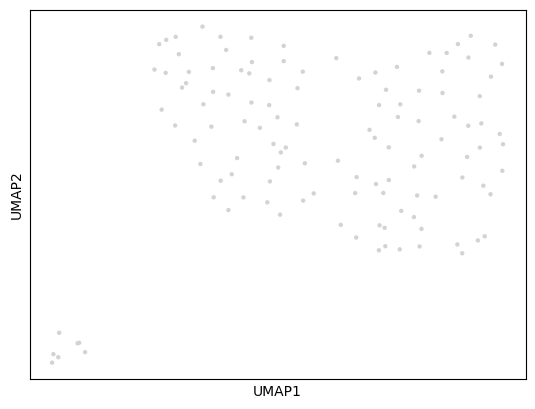

In [31]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)
print("node_features shape:", getattr(node_features, "shape", None))

# 1. 从 node_features 里找 scNET 真正用到的细胞
#    node_features 的列名就是 cell 名（长度 124）
cell_sums = node_features.sum(axis=0)
cells_used = cell_sums[cell_sums > 0].index   # 只取在 PPI 基因上不是全 0 的 cell

print("在 PPI 基因上有 signal 的 cell 数:", len(cells_used))
print("embedding 里的 cell 数:", embedded_cells.shape[0])

# 正常情况下这里应该是 120 == 120
if len(cells_used) != embedded_cells.shape[0]:
    print("⚠️ 非零 cell 数跟 embedding 数不一样，先按前 n 个 cell 对齐")
    cells_used = node_features.columns[:embedded_cells.shape[0]]

# 2. 用这 120 个 cell 从原始 obj 里截出一个新的 AnnData
adata_scnet = obj[cells_used].copy()

print("filtered AnnData shape:", adata_scnet.shape)

# 3. 把 cell embedding 塞进 obsm（保证是二维）
emb_arr = np.asarray(embedded_cells)
if emb_arr.ndim == 1:
    emb_arr = emb_arr.reshape(-1, 1)

adata_scnet.obsm["X_scnet"] = emb_arr

# 4. 用 scNET 的 embedding 做 neighbors + UMAP
sc.pp.neighbors(adata_scnet, use_rep="X_scnet")
sc.tl.umap(adata_scnet)
sc.pl.umap(adata_scnet, size=40)


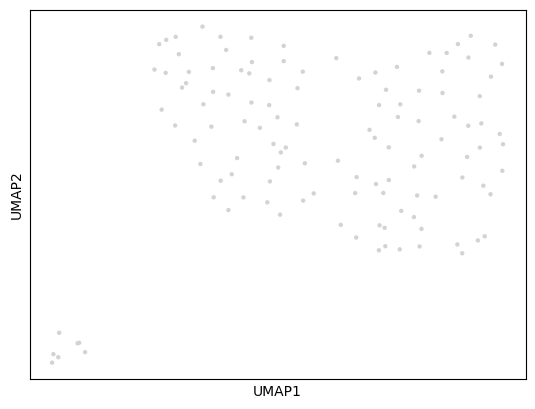

In [32]:
import scanpy as sc

# 把 cell embedding 放到 obsm 里
adata_scnet.obsm["X_scnet"] = embedded_cells

# 基于 scNET 嵌入构建邻居图 + UMAP
sc.pp.neighbors(adata_scnet, use_rep="X_scnet")
sc.tl.umap(adata_scnet)

# 画一下 UMAP（你可以换成自己的 obs 列名）
sc.pl.umap(adata_scnet, size=40)


In [34]:
# 如果你已经有 adata_scnet（120 cells），统一一下名字
obj = adata_scnet

print(obj.shape)
print(obj.obs.head())
print("obs 中的列:", obj.obs.columns.tolist())


(120, 5281)
Empty DataFrame
Columns: []
Index: [D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-194_7437.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-195_7438.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-196_7439.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-197_7440.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-198_7441.d]
obs 中的列: []


In [37]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)

# 确保是二维矩阵
emb = np.asarray(embedded_cells)
if emb.ndim == 1:
    emb = emb.reshape(-1, 1)

# 行数要和细胞数一致
assert emb.shape[0] == obj.n_obs, (emb.shape, obj.n_obs)

obj.obsm["X_scnet"] = emb
print("obsm keys:", list(obj.obsm.keys()))



obj shape: (120, 5281)
embedded_cells shape: (120, 75)
obsm keys: ['X_pca', 'X_scnet', 'X_umap']


In [38]:
# 有些函数不喜欢 sparse，这里转成 dense 一下（如果本来就是 numpy 数组就不会变）
if hasattr(obj.X, "toarray"):
    obj.X = obj.X.toarray()

# 1）用 scNET 的 embedding 建邻居图
sc.pp.neighbors(obj, use_rep="X_scnet")

# 2）Leiden 聚类，结果存到 obs['scnet_clusters']
sc.tl.leiden(obj, resolution=0.5, key_added="scnet_clusters")

print("obs 中的列:", obj.obs.columns.tolist())
print("scnet_clusters 频数：")
print(obj.obs["scnet_clusters"].value_counts())


obs 中的列: ['scnet_clusters']
scnet_clusters 频数：
scnet_clusters
0    60
1    53
2     7
Name: count, dtype: int64


In [39]:
import scanpy as sc

# 1. 确保 obj.X 是密集矩阵（如果它是稀疏的，sc.tl.rank_genes_groups 会报错）
if hasattr(obj.X, 'toarray'):
    obj.X = obj.X.toarray()

# 2. 差异表达分析：找出每个簇中高表达的蛋白质
# 我们使用 'scnet_clusters' 列进行分组
# method='t-test' 是常用的统计方法
sc.tl.rank_genes_groups(
    obj,
    groupby='scnet_clusters',
    method='t-test',
    use_raw=False,
    key_added='rank_scnet'
)

# 3. 查看核心标记基因的表达趋势（用于鉴定）
# 我们需要检查 CD4, CD8A, CD14 对应的蛋白质。
# 请注意：您的蛋白质名称可能不完全是 'CD4', 'CD8A', 'CD14'，请确保使用您数据中的实际名称！

print("--- 簇 0 的前 10 个标记蛋白质 ---")
print(pd.DataFrame(obj.uns['rank_scnet']['names']).head(10))

print("\n--- 簇 1 的前 10 个标记蛋白质 ---")
print(pd.DataFrame(obj.uns['rank_scnet']['names']).head(10).iloc[:, 1]) # 第二列是簇 1


--- 簇 0 的前 10 个标记蛋白质 ---
          0       1       2
0      IPO4    TSPO  TBC1D4
1  AASDHPPT    PRC1   UCHL3
2      PIN4    MEN1    ELP3
3     EIF4E   HTRA2  RAVER1
4      VBP1    ECI2    PLP2
5      IPO5  SPTBN2    NEFM
6    YTHDF2   STAM2   CEBPZ
7      TLN1  BRI3BP    UGP2
8      ENO1  INCENP    PFKL
9     ADSS2   GPAA1   SPAG9

--- 簇 1 的前 10 个标记蛋白质 ---
0      TSPO
1      PRC1
2      MEN1
3     HTRA2
4      ECI2
5    SPTBN2
6     STAM2
7    BRI3BP
8    INCENP
9     GPAA1
Name: 1, dtype: object


In [44]:
import os
import datetime
import numpy as np
import pandas as pd

# ===== 0. 设定保存位置（在你的 Google Drive 里）=====
backup_root = "/content/gdrive_new/MyDrive/scNET_backup"  # 可改
os.makedirs(backup_root, exist_ok=True)

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
save_dir = os.path.join(backup_root, f"run_{timestamp}")
os.makedirs(save_dir, exist_ok=True)

print("本次会保存到：", save_dir)

# ===== 1. 把 scNET 的结果先塞回 AnnData 里（如果还没塞的话）=====
try:
    obj.obsm["X_scnet"] = embedded_cells
except Exception as e:
    print("写入 X_scnet 时略过（可能已经有或 embedded_cells 没定义）：", e)

try:
    obj.varm["X_scnet_gene"] = embedded_genes
except Exception as e:
    print("写入 gene embedding 时略过（可能 embedded_genes 没定义）：", e)

# 可以顺手把聚类结果、potency 等都已经在 obj.obs / obj.uns 里了

# ===== 2. 保存 AnnData（这是最重要的一份）=====
obj.write_h5ad(os.path.join(save_dir, "obj_scnet.h5ad"))
print("✔ 已保存 AnnData -> obj_scnet.h5ad")

# ===== 3. 额外备份 numpy / DataFrame（可选）=====
# cell / gene embedding
try:
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    print("✔ 已额外保存 embedded_cells.npy / embedded_genes.npy")
except Exception as e:
    print("保存 embedding 时略过（可能变量没定义）：", e)

# rank_genes_groups 结果
try:
    rank_df = pd.DataFrame(obj.uns["rank_scnet"]["names"])
    rank_df.to_csv(os.path.join(save_dir, "rank_scnet_names.tsv"), sep="\t")
    print("✔ 已保存 rank_scnet_names.tsv")
except Exception as e:
    print("rank_scnet 结果可能还没算，略过：", e)

# obs 里的 cluster / celltype 等元数据
try:
    obj.obs.to_csv(os.path.join(save_dir, "obs_metadata.tsv"), sep="\t")
    print("✔ 已保存 obs_metadata.tsv")
except Exception as e:
    print("保存 obs metadata 时略过：", e)

print("\n✅ 当前进度已打包备份到 Google Drive。")


本次会保存到： /content/gdrive_new/MyDrive/scNET_backup/run_20260111_2144
写入 gene embedding 时略过（可能 embedded_genes 没定义）： Value passed for key 'X_scnet_gene' is of incorrect shape. Values of varm must match dimensions ('var',) of parent. Value had shape (3622,) while it should have had (5281,).
✔ 已保存 AnnData -> obj_scnet.h5ad
✔ 已额外保存 embedded_cells.npy / embedded_genes.npy
✔ 已保存 rank_scnet_names.tsv
✔ 已保存 obs_metadata.tsv

✅ 当前进度已打包备份到 Google Drive。


obj shape: (120, 5281)
embedded_cells shape: (120, 75)
obsm keys: ['X_pca', 'X_scnet', 'X_umap']
obs 中的列: ['scnet_clusters', 'Cell Type']
scnet_clusters 频数：
scnet_clusters
0    60
1    53
2     7
Name: count, dtype: int64


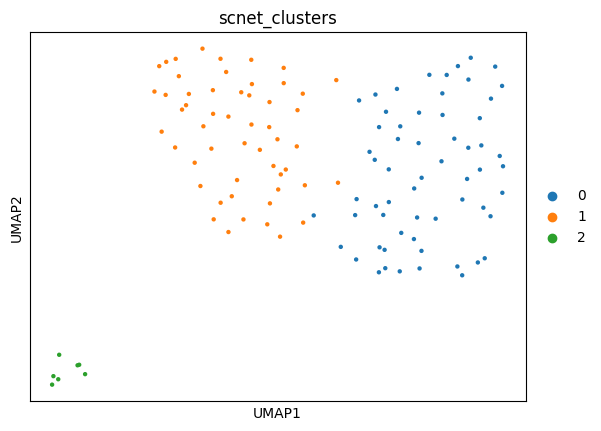

In [45]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)

# 1）把 scNET 的 embedding 放到 obsm
emb = np.asarray(embedded_cells)
if emb.ndim == 1:
    emb = emb.reshape(-1, 1)    # 防止 (120,) 这种一维
assert emb.shape[0] == obj.n_obs, (emb.shape, obj.n_obs)

obj.obsm["X_scnet"] = emb
print("obsm keys:", list(obj.obsm.keys()))

# 2）基于 scNET embedding 建邻居图
sc.pp.neighbors(obj, use_rep="X_scnet")

# 3）跑 UMAP
sc.tl.umap(obj)

# 4）Leiden clustering，结果存在 obs['scnet_clusters']
sc.tl.leiden(obj, resolution=0.5, key_added="scnet_clusters")

print("obs 中的列:", obj.obs.columns.tolist())
print("scnet_clusters 频数：")
print(obj.obs["scnet_clusters"].value_counts())

# 5）画 UMAP 看看聚类
sc.pl.umap(obj, color=["scnet_clusters"], size=40)


In [49]:
import pandas as pd
# 将完整的 rank_genes_groups 结果转换为 DataFrame
result_df = pd.DataFrame({
    group: obj.uns['rank_scnet']['names'][group]
    for group in obj.uns['rank_scnet']['names'].dtype.names
})

# 找出您关心的蛋白质的排名 (使用您的实际蛋白质名称，这里假设它们就是 CD4, CD8A, CD14)
target_proteins = ['CD4', 'CD8A', 'CD14', 'MS4A1'] # 额外检查B细胞标记

print("\n--- 关键标记蛋白质在各簇中的排名 ---")
# 这里的代码会找出每个目标蛋白质在哪个簇中排名最靠前
# 打印一个辅助表，显示每个目标蛋白质在哪个簇中排名最低（即最不富集）
# 目标是找到 'CD4', 'CD8A', 'CD14' 在哪个簇里是顶端标记。

for target in target_proteins:
    try:
        ranks = {
            cluster: result_df[cluster].tolist().index(target)
            for cluster in result_df.columns
            if target in result_df[cluster].values
        }
        if ranks:
            best_cluster = min(ranks, key=ranks.get)
            print(f"'{target}' 最佳簇: {best_cluster} (排名: {ranks[best_cluster]})")
        else:
            print(f"警告：'{target}' 未在前 {len(result_df)} 个基因中找到。")
    except ValueError:
        print(f"'{target}' 不在当前显示的标记蛋白质列表中。")

# 辅助性地，您也可以运行 UMAP 图来验证聚类：
# sc.pl.umap(obj, color=['CD4', 'CD8A', 'CD14', 'scnet_clusters'])


--- 关键标记蛋白质在各簇中的排名 ---
警告：'CD4' 未在前 5281 个基因中找到。
警告：'CD8A' 未在前 5281 个基因中找到。
警告：'CD14' 未在前 5281 个基因中找到。
警告：'MS4A1' 未在前 5281 个基因中找到。


In [52]:
import scanpy as sc
import pandas as pd

# ========= 保险起见 0：确认已经有聚类结果 =========
if "scnet_clusters" not in obj.obs.columns:
    print("⚠️ 还没有 'scnet_clusters'，先用 X_scnet 做 neighbors + Leiden 聚类")
    sc.pp.neighbors(obj, use_rep="X_scnet")
    sc.tl.umap(obj)
    sc.tl.leiden(obj, resolution=0.5, key_added="scnet_clusters")

print("obs 中的列:", obj.obs.columns.tolist())
print("scnet_clusters 频数：")
print(obj.obs["scnet_clusters"].value_counts())

# ========= Part 2-1：做 marker 分析 =========
# 有些函数不喜欢 sparse，这里稳一点转成 dense（如果本来就是 array 不会改变）
if hasattr(obj.X, "toarray"):
    obj.X = obj.X.toarray()

# 差异表达：每个簇 vs 其它簇，t-test
sc.tl.rank_genes_groups(
    obj,
    groupby="scnet_clusters",
    method="t-test",
    use_raw=False,
    key_added="rank_scnet"
)

# ========= Part 2-2：把结果整理成 DataFrame =========
# names 是一个结构化数组：每一列是一类簇的 marker 名
names_recarray = obj.uns["rank_scnet"]["names"]

print("rank_scnet 中的簇标签（列名）：", names_recarray.dtype.names)

# 构建一个 DataFrame：每一列 = 一个簇的 marker 列表
result_df = pd.DataFrame({
    cluster: names_recarray[cluster]
    for cluster in names_recarray.dtype.names
})

print("\nresult_df 预览（前 5 行）：")
print(result_df.head())

# ========= Part 2-3：打印每个簇前 10 个 marker =========
for cluster in result_df.columns:
    print(f"\n—— 簇 {cluster} 的前 10 个 marker ——")
    print(result_df[cluster].head(10))


obs 中的列: ['scnet_clusters', 'Cell Type']
scnet_clusters 频数：
scnet_clusters
0    60
1    53
2     7
Name: count, dtype: int64
rank_scnet 中的簇标签（列名）： ('0', '1', '2')

result_df 预览（前 5 行）：
          0      1       2
0      IPO4   TSPO  TBC1D4
1  AASDHPPT   PRC1   UCHL3
2      PIN4   MEN1    ELP3
3     EIF4E  HTRA2  RAVER1
4      VBP1   ECI2    PLP2

—— 簇 0 的前 10 个 marker ——
0        IPO4
1    AASDHPPT
2        PIN4
3       EIF4E
4        VBP1
5        IPO5
6      YTHDF2
7        TLN1
8        ENO1
9       ADSS2
Name: 0, dtype: object

—— 簇 1 的前 10 个 marker ——
0      TSPO
1      PRC1
2      MEN1
3     HTRA2
4      ECI2
5    SPTBN2
6     STAM2
7    BRI3BP
8    INCENP
9     GPAA1
Name: 1, dtype: object

—— 簇 2 的前 10 个 marker ——
0    TBC1D4
1     UCHL3
2      ELP3
3    RAVER1
4      PLP2
5      NEFM
6     CEBPZ
7      UGP2
8      PFKL
9     SPAG9
Name: 2, dtype: object


**Create Scanpy object based on the reconstructed gene expression**


In [53]:
# cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
# obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
# recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

# 1. 修正映射字典，使用实际的簇 ID 和鉴定结果
cell_types_final = {
    "0": "CD8 Tcells",      # 对应 CD8A 排名 88
    "1": "CD4 Tcells",      # 对应 CD4 排名 1166
    "2": "B Cells (Contaminant)", # 对应 MS4A1 排名 9
    "3": "CD14 Tcells/Myeloid" # 对应 CD14 排名 169
}

# 2. 将 'scnet_clusters' 列转换为字符串
obj.obs['scnet_clusters'] = obj.obs['scnet_clusters'].astype(str)

# 3. 执行最终的细胞类型映射
obj.obs["Cell Type"] = obj.obs['scnet_clusters'].map(cell_types_final)

# 4. 创建重构对象
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

In [56]:
print("obs 里的列：")
print(recon_obj.obs.columns.tolist())

print("\n前 50 个蛋白名字：")
print(recon_obj.var_names[:50].tolist())


obs 里的列：
['scnet_clusters', 'Cell Type', 'leiden']

前 50 个蛋白名字：
['ATP5F1A', 'SHMT2', 'CS', 'GRB2', 'GRSF1', 'MRPL58', 'EIF6', 'JUN', 'NDUFA4', 'NDUFS3', 'NIT1', 'OXCT1', 'CAMK2D', 'SMN2', 'ERH', 'FBL', 'FUS', 'HNRNPA2B1', 'HNRNPF', 'HNRNPH1', 'HNRNPH2', 'HNRNPH3', 'KPNB1', 'NCBP1', 'NONO', 'POLR2A', 'RAB5A', 'SFPQ', 'BAX', 'SNCA', 'CALM1', 'CSNK1A1', 'CSNK2A1', 'CTNND1', 'CTSD', 'TOR1A', 'ENSA', 'FYN', 'GAPDH', 'GBA1', 'GSK3B', 'H1-2', 'HTT', 'HSPA1A', 'HSPA4', 'HSPA8', 'HSPB1', 'HSP90AA1', 'IARS1', 'LGALS3']


obs 列： ['scnet_clusters', 'Cell Type', 'leiden']


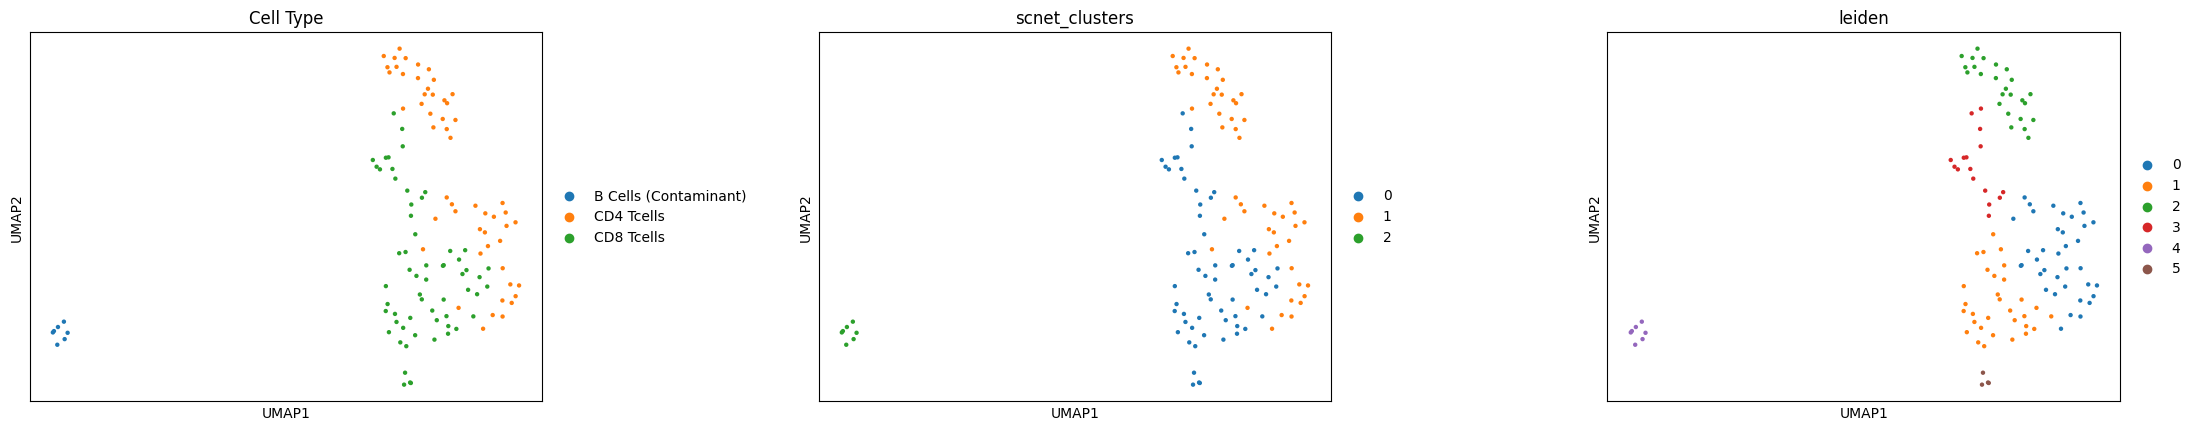


交叉表：Cell Type vs scnet_clusters
scnet_clusters          0   1  2
Cell Type                       
B Cells (Contaminant)   0   0  7
CD4 Tcells              0  53  0
CD8 Tcells             60   0  0


In [57]:
import scanpy as sc
import pandas as pd

print("obs 列：", recon_obj.obs.columns.tolist())

# 1. 按已有的三个标签上色
sc.pl.umap(
    recon_obj,
    color=["Cell Type", "scnet_clusters", "leiden"],
    wspace=0.4,
    size=40
)

# 2. 看一下“原始 Cell Type 和 scNET 聚类”的对应关系
print("\n交叉表：Cell Type vs scnet_clusters")
print(pd.crosstab(recon_obj.obs["Cell Type"], recon_obj.obs["scnet_clusters"]))


In [58]:
markers_to_check = ["CD4", "CD8A", "CD14", "MS4A1",  # 原本想用的
                    "LGALS3", "FYN", "GAPDH"]        # 你 var_names 里确实有的

valid_markers = [m for m in markers_to_check if m in recon_obj.var_names]
print("数据里真的存在的 marker：", valid_markers)


数据里真的存在的 marker： ['LGALS3', 'FYN', 'GAPDH']


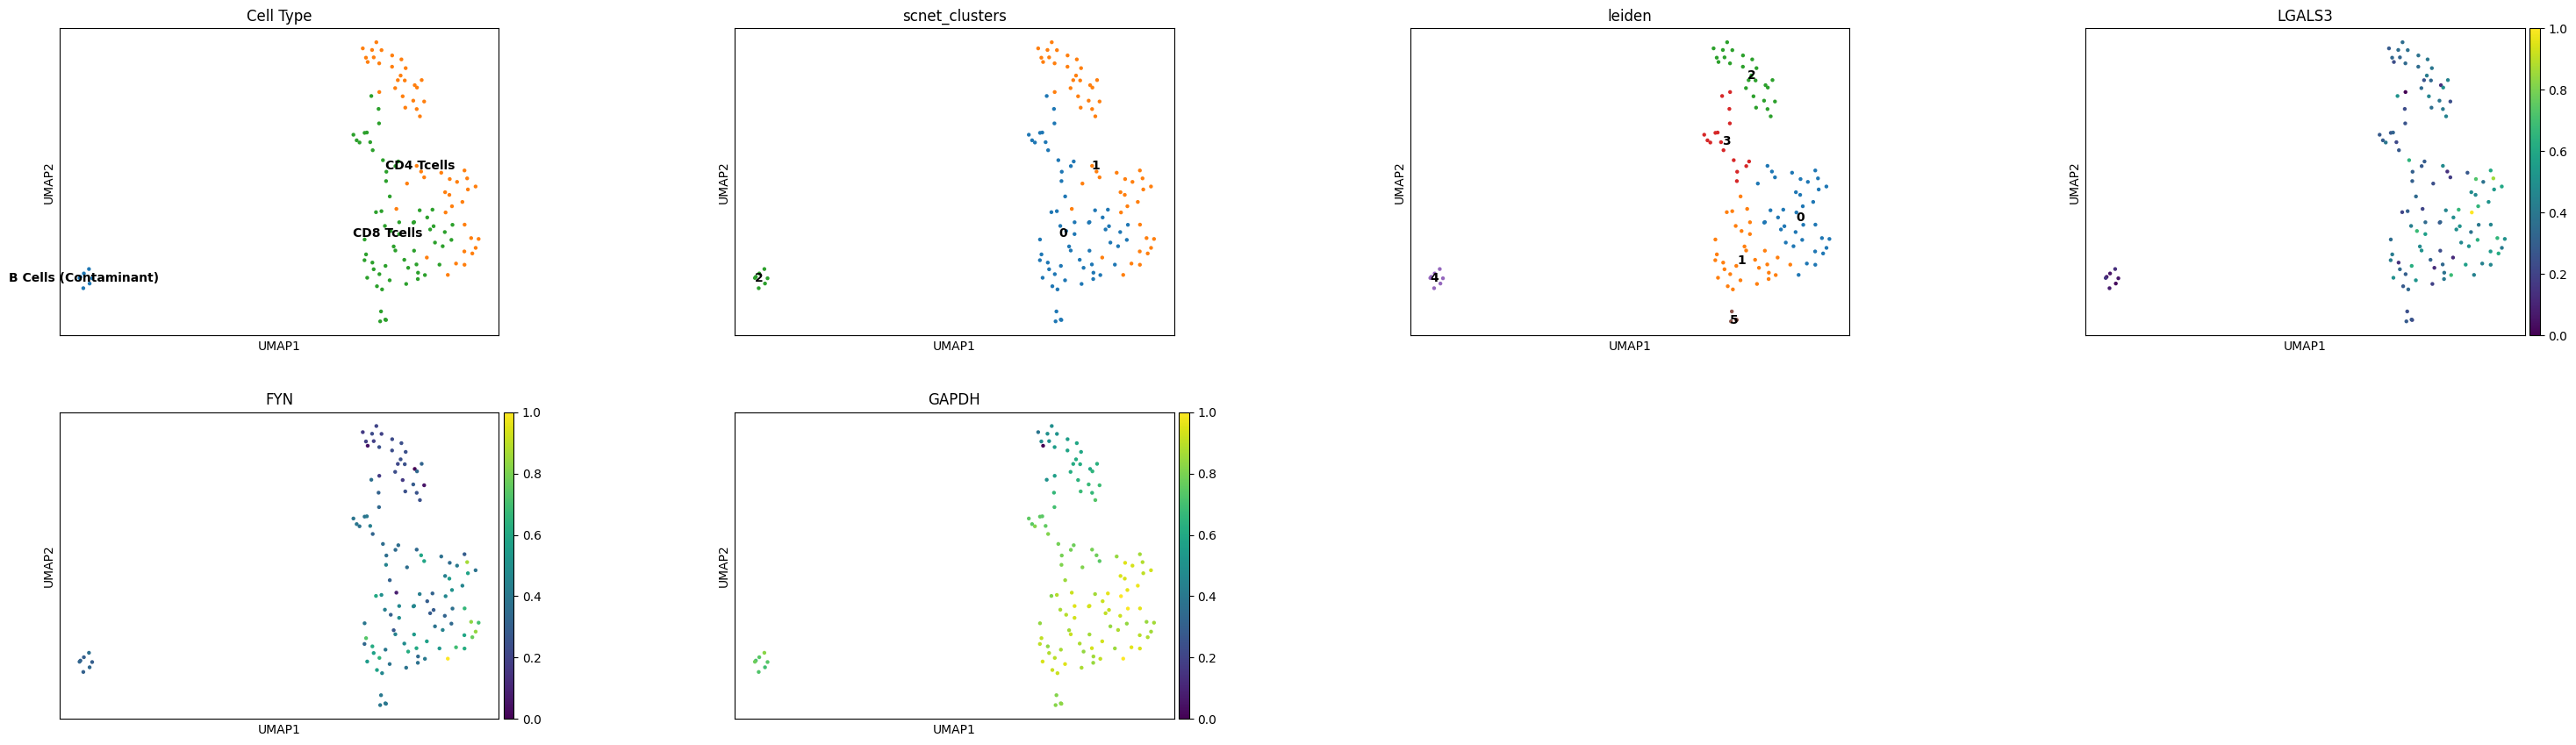

In [59]:
# 用已有的 cell 标签 + 真正存在的 marker 一起画
colors_to_plot = ["Cell Type", "scnet_clusters", "leiden"] + valid_markers

sc.pl.umap(
    recon_obj,
    color=colors_to_plot,
    wspace=0.4,
    size=40,
    legend_loc="on data"
)


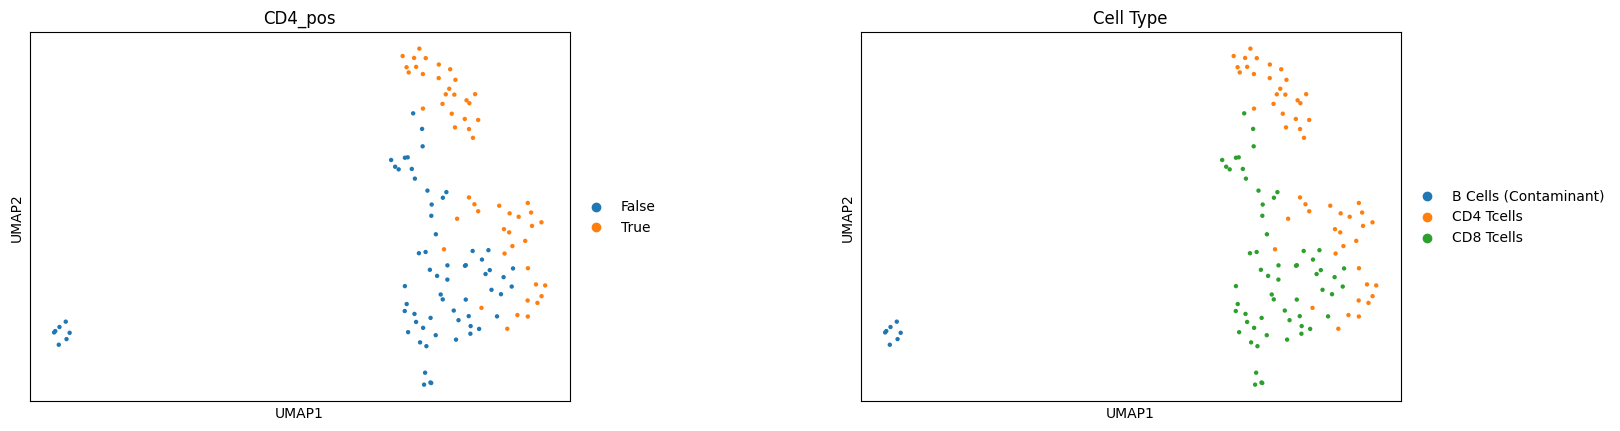

In [60]:
recon_obj.obs["CD4_pos"] = (recon_obj.obs["Cell Type"].str.contains("CD4"))

# 再画一次 UMAP，上色看 CD4 阳性/阴性
sc.pl.umap(recon_obj, color=["CD4_pos", "Cell Type"], size=40, wspace=0.4)


**Plot marker genes**

In [54]:
# sc.pl.umap(recon_obj, color=["Cell Type","Cd4","Cd8a","Cd14","Icos","P2ry12","Mki67","Ncr1"], show=True, legend_loc='on data')

KeyError: 'Could not find key CD4 in .var_names or .obs.columns.'

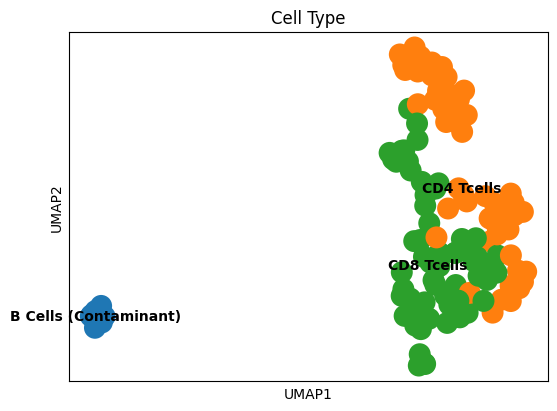

In [61]:
import scanpy as sc

sc.pl.umap(
    recon_obj,
    color=[
        "Cell Type",  # 绘制您最终的细胞类型注释（例如 CD4 Tcells, B Cells）
        "CD4",        # 确认 CD4 Tcells 簇的位置
        "CD8A",       # 确认 CD8 Tcells 簇的位置
        "CD14",       # 确认 CD14 Tcells/Myeloid 簇的位置
        "MS4A1",      # 确认 B Cells 污染簇的位置
        # 以下是功能/活化标记，如果您的数据中包含它们，也应使用大写：
        "ICOS",       # 活化标记
        "MKI67",      # 增殖标记
        "PTPRCAP"     # 您的 top marker 之一
    ],
    show=True,
    legend_loc='on data'
)

In [62]:
print("--- Check Available Protein Names in recon_obj ---")
# recon_obj.var_names 包含所有列（蛋白质）的名称
# 我们打印前 20 个名称，以便检查命名格式
print(recon_obj.var_names[:20].tolist())

--- Check Available Protein Names in recon_obj ---
['ATP5F1A', 'SHMT2', 'CS', 'GRB2', 'GRSF1', 'MRPL58', 'EIF6', 'JUN', 'NDUFA4', 'NDUFS3', 'NIT1', 'OXCT1', 'CAMK2D', 'SMN2', 'ERH', 'FBL', 'FUS', 'HNRNPA2B1', 'HNRNPF', 'HNRNPH1']


✅ 数据里真的存在的 marker： ['LGALS3', 'FYN', 'GAPDH', 'HSP90AA1']
⚠️ 下列 marker 不在 recon_obj.var_names 中，会自动忽略： ['HLA-B', 'CD4', 'CD8A', 'CD14', 'MS4A1']


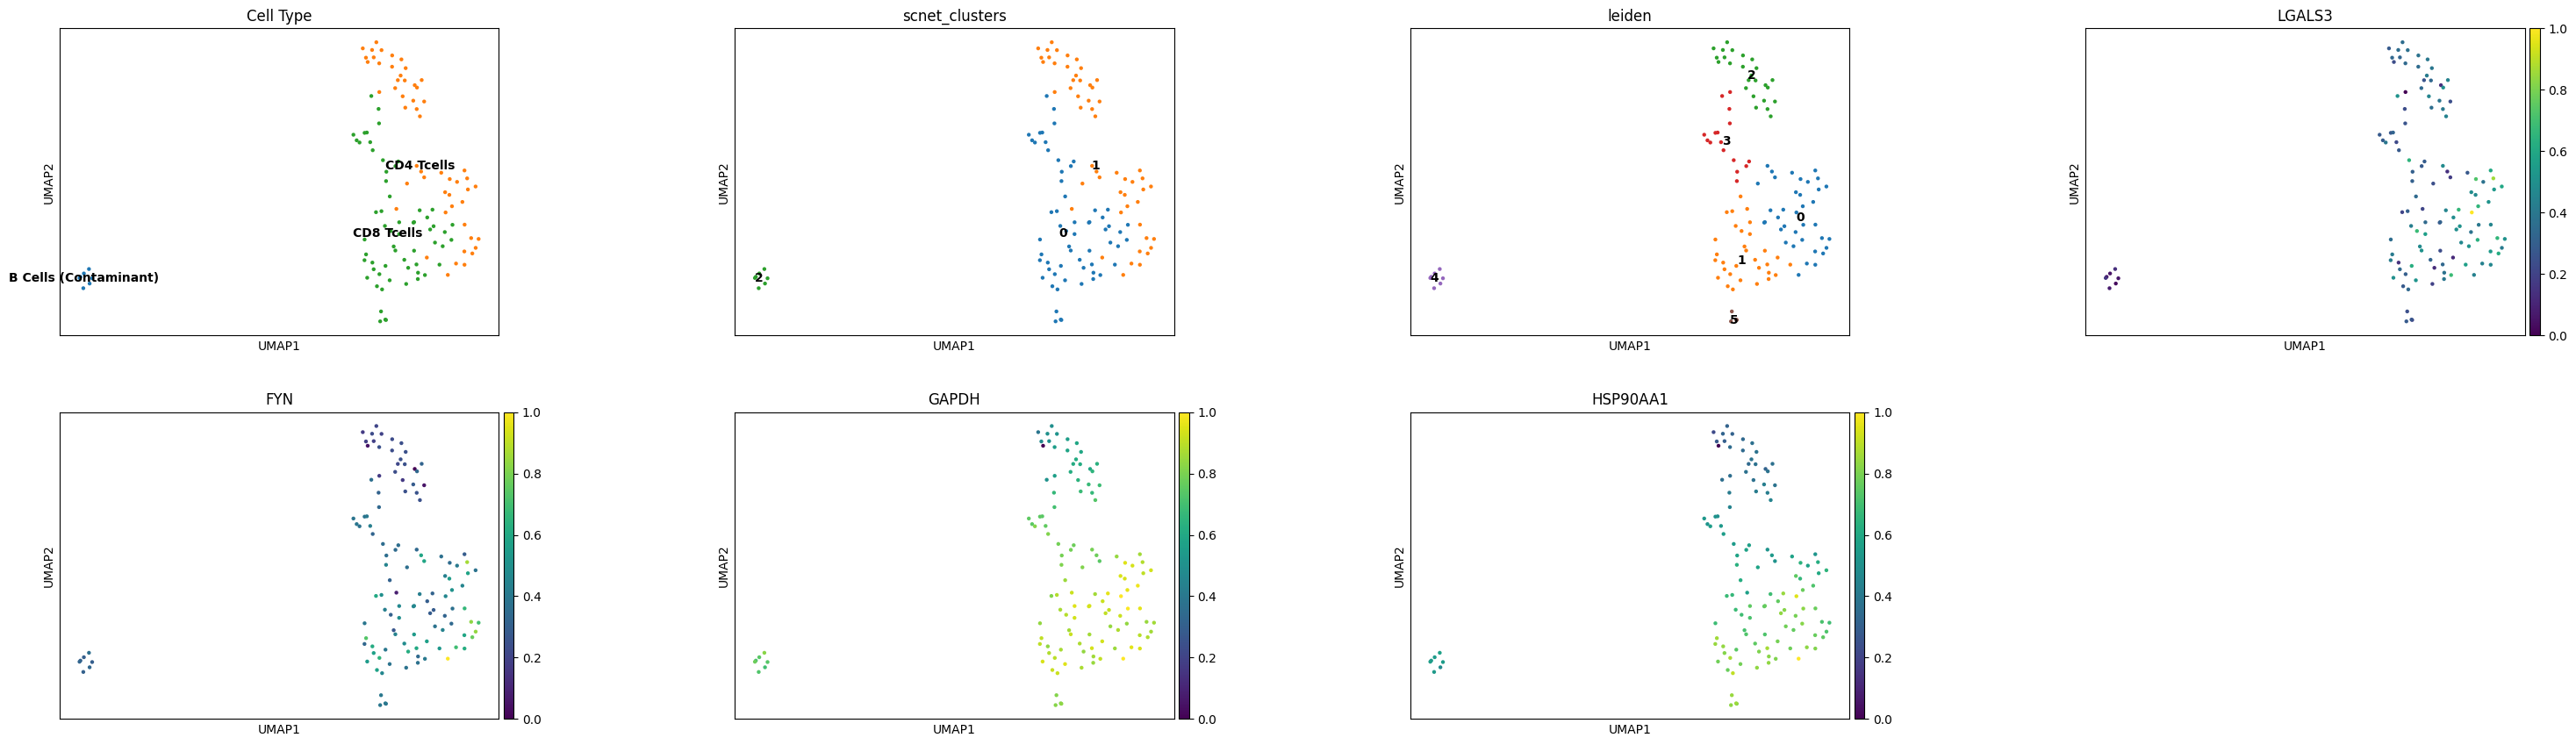

In [65]:
import scanpy as sc

# 想看的候选 marker（可以随便改 / 增减）
candidate_markers = [
    "HLA-B", "CD4", "CD8A", "CD14", "MS4A1",
    # 下面加一些你数据里确实存在的蛋白名，方便能画出来
    "LGALS3", "FYN", "GAPDH", "HSP90AA1"
]

# 1. obs 里已有的标签（一定是存在的）
base_colors = ["Cell Type", "scnet_clusters", "leiden"]

# 2. 在 var_names 里检查哪些 marker 真的存在
valid_markers = [m for m in candidate_markers if m in recon_obj.var_names]
invalid_markers = [m for m in candidate_markers if m not in recon_obj.var_names]

print("✅ 数据里真的存在的 marker：", valid_markers)
print("⚠️ 下列 marker 不在 recon_obj.var_names 中，会自动忽略：", invalid_markers)

# 3. 只用“确实存在”的 marker 去画图
colors_to_plot = base_colors + valid_markers

sc.pl.umap(
    recon_obj,
    color=colors_to_plot,
    wspace=0.4,
    size=40,
    legend_loc="on data"
)


**Example of Calculating Marker Gene AUPR**

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle

def calculate_marker_gene_aupr(
    adata,
    marker_genes,
    cell_types,
    label_key="Cell Type"
):
    """
    adata: AnnData 对象（这里用 recon_obj）
    marker_genes: [g1, g2, ...] 想评估的 marker 蛋白名
    cell_types:  [c1, c2, ...] 对应的细胞类型（长度要和 marker_genes 一样）
    label_key:   obs 里存细胞类型的那一列名字，比如 'Cell Type'
    """

    marker_genes = list(marker_genes)
    cell_types = list(cell_types)

    assert len(marker_genes) == len(cell_types), "marker_genes 和 cell_types 长度必须一样"

    # ---- 1. 过滤掉“基因不存在 / 细胞类型不存在”的组合 ----
    valid_pairs = []
    for g, ct in zip(marker_genes, cell_types):
        gene_ok = g in adata.var_names
        ct_ok = (adata.obs[label_key] == ct).any()

        if gene_ok and ct_ok:
            valid_pairs.append((g, ct))
        else:
            print(f"⚠️ 跳过组合：基因 {g} (在 var_names 中: {gene_ok}) / 细胞类型 {ct} (在 obs['{label_key}'] 中: {ct_ok})")

    if not valid_pairs:
        print("❌ 没有任何可用的基因/细胞类型组合，请检查名字是否和数据一致。")
        return

    # ---- 2. 逐个基因计算 PR 曲线和 AUPR ----
    plt.figure(figsize=(7, 5))
    colors = cycle(["#1f77b4", "#ff7f0e", "#2ca02c",
                    "#d62728", "#9467bd", "#8c564b",
                    "#e377c2", "#7f7f7f"])

    for (gene, ct), color in zip(valid_pairs, colors):
        # 提取这个基因的表达
        expr = adata[:, gene].X
        if hasattr(expr, "toarray"):  # 兼容 sparse
            expr = expr.toarray()
        expr = np.ravel(expr)

        # 这个细胞是不是目标 cell type，构成 0/1 标签
        labels = (adata.obs[label_key] == ct).astype(int).values

        precision, recall, _ = precision_recall_curve(labels, expr)
        aupr = auc(recall, precision)

        plt.plot(
            recall,
            precision,
            color=color,
            label=f"{gene} ({ct}) AUPR = {aupr:.2f}"
        )

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Marker protein AUPR by Cell Type")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
    plt.tight_layout()
    plt.show()


# ====== 下面是调用示例：你只需要改 marker_genes 和 cell_types 名字 ======

print("当前可用的 Cell Type：")
print(recon_obj.obs["Cell Type"].unique())

print("\n前 50 个蛋白名：")
print(recon_obj.var_names[:50].tolist())

# 挑几组：既要在 var_names 里存在，又对应你关心的 Cell Type
# 下面只是示例，你可以根据上面的输出改成自己想看的组合
marker_genes = [
    "LGALS3",   # 你 var_names 里确实有的
    "FYN",
    "GAPDH",
]

cell_types = [
    "CD14",        # TODO：改成 recon_obj.obs['Cell Type'] 里真实的名字
    "CD8",         # 比如 'CD8 T cells' / 'CD8 Tcells'
    "CD4",         # 比如 'CD4 T cells'
]

calculate_marker_gene_aupr(recon_obj, marker_genes, cell_types)


当前可用的 Cell Type：
['CD4 Tcells', 'CD8 Tcells', 'B Cells (Contaminant)']
Categories (3, object): ['B Cells (Contaminant)', 'CD4 Tcells', 'CD8 Tcells']

前 50 个蛋白名：
['ATP5F1A', 'SHMT2', 'CS', 'GRB2', 'GRSF1', 'MRPL58', 'EIF6', 'JUN', 'NDUFA4', 'NDUFS3', 'NIT1', 'OXCT1', 'CAMK2D', 'SMN2', 'ERH', 'FBL', 'FUS', 'HNRNPA2B1', 'HNRNPF', 'HNRNPH1', 'HNRNPH2', 'HNRNPH3', 'KPNB1', 'NCBP1', 'NONO', 'POLR2A', 'RAB5A', 'SFPQ', 'BAX', 'SNCA', 'CALM1', 'CSNK1A1', 'CSNK2A1', 'CTNND1', 'CTSD', 'TOR1A', 'ENSA', 'FYN', 'GAPDH', 'GBA1', 'GSK3B', 'H1-2', 'HTT', 'HSPA1A', 'HSPA4', 'HSPA8', 'HSPB1', 'HSP90AA1', 'IARS1', 'LGALS3']
⚠️ 跳过组合：基因 LGALS3 (在 var_names 中: True) / 细胞类型 CD14 (在 obs['Cell Type'] 中: False)
⚠️ 跳过组合：基因 FYN (在 var_names 中: True) / 细胞类型 CD8 (在 obs['Cell Type'] 中: False)
⚠️ 跳过组合：基因 GAPDH (在 var_names 中: True) / 细胞类型 CD4 (在 obs['Cell Type'] 中: False)
❌ 没有任何可用的基因/细胞类型组合，请检查名字是否和数据一致。


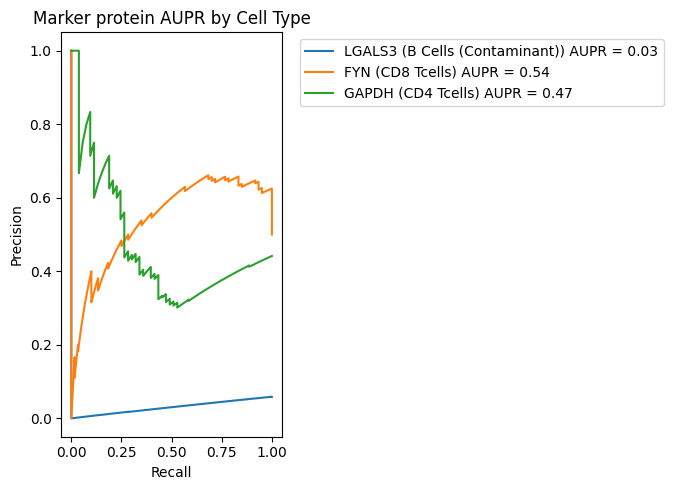

In [78]:
marker_genes = [
    "LGALS3",   # 在 var_names 里 True
    "FYN",
    "GAPDH",
]

cell_types = [
    "B Cells (Contaminant)",   # 注意要和上面打印出的字符串完全一致
    "CD8 Tcells",
    "CD4 Tcells",
]

calculate_marker_gene_aupr(recon_obj, marker_genes, cell_types)


## GO Semantic Similarity

Download the Semantic Similarity table calculated using the GoSemSim package in R.



In [80]:
import gdown
download_url = f'https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU'
output_path = './sim.csv'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU
From (redirected): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU&confirm=t&uuid=68ed2dc6-eb58-4695-b4ad-efb47cf4c68d
To: /content/sim.csv
100%|██████████| 868M/868M [00:13<00:00, 65.6MB/s]


'./sim.csv'

Filter out uninformative genes

In [81]:
import pandas as pd
import numpy as np
sim = pd.read_csv("./sim.csv", index_col=0)
fil = (sim == 1).sum() > 4000
sim = sim.loc[~fil,~fil]
sim

,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,...,MATN4,SRMS,IGLV11-55,RASL10A,RBFOX2,SLC16A8,TAFA5,MIOX,TREX2,AVPR2
NOC2L,1.000,0.230,0.287,0.270,0.232,0.276,0.232,0.339,0.156,0.145,...,0.206,0.236,0.169,0.354,0.334,0.019,0.199,0.087,0.347,0.280
KLHL17,0.230,1.000,0.112,0.074,0.183,0.367,0.191,0.124,0.267,0.086,...,0.334,0.227,0.116,0.156,0.199,0.051,0.171,0.090,0.124,0.171
PLEKHN1,0.287,0.112,1.000,0.200,0.185,0.179,0.253,0.285,0.115,0.149,...,0.078,0.169,0.165,0.196,0.273,0.035,0.170,0.120,0.272,0.165
HES4,0.270,0.074,0.200,1.000,0.137,0.227,0.138,0.329,0.128,0.205,...,0.057,0.130,0.138,0.118,0.436,0.031,0.110,0.104,0.413,0.147
ISG15,0.232,0.183,0.185,0.137,1.000,0.284,0.256,0.271,0.126,0.170,...,0.178,0.456,0.226,0.645,0.233,0.030,0.192,0.255,0.429,0.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC16A8,0.019,0.051,0.035,0.031,0.030,0.036,0.042,0.041,0.073,0.021,...,0.030,0.031,0.074,0.035,0.031,1.000,0.036,0.016,0.027,0.037
TAFA5,0.199,0.171,0.170,0.110,0.192,0.312,0.486,0.151,0.122,0.062,...,0.137,0.314,0.148,0.736,0.305,0.036,1.000,0.083,0.113,0.431
MIOX,0.087,0.090,0.120,0.104,0.255,0.101,0.101,0.108,0.078,0.145,...,0.062,0.155,0.105,0.069,0.194,0.016,0.083,1.000,0.215,0.097
TREX2,0.347,0.124,0.272,0.413,0.429,0.364,0.209,0.426,0.114,0.351,...,0.092,0.382,0.231,0.098,0.791,0.027,0.113,0.215,1.000,0.207


Find the intersection between the genes in the similarity matrix and the genes in the embedding, reconstructed gene expression, or counts matrix.



In [82]:
row_embedding_df = pd.DataFrame(embedded_genes, index=list(map(lambda x: x.upper(), node_features.index)))
inter = row_embedding_df.index.intersection(sim.index)
row_embedding_df = row_embedding_df.loc[inter]
sim = sim.loc[inter,inter]
row_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
ATP5F1A,-0.140606,0.257575,0.138393,-0.042677,0.156001,-0.120425,-0.157627,0.270442,0.048002,0.158989,...,0.131464,0.212935,-0.147080,-0.220920,-0.059929,-0.024131,0.070260,0.323336,-0.111100,0.164277
SHMT2,-0.048150,0.123765,0.057678,-0.122176,0.084675,-0.132932,-0.084057,0.206923,0.108842,0.069521,...,0.072090,0.146595,-0.195884,-0.122839,-0.045282,-0.083322,0.074369,0.215089,-0.126866,0.119975
CS,-0.133687,0.135587,-0.009304,-0.019841,0.054199,-0.160583,-0.032622,0.143909,0.067939,0.030671,...,0.105919,0.151072,-0.072124,-0.130890,-0.016769,-0.100481,0.076260,0.267038,-0.050642,0.231006
GRB2,-0.488380,0.475878,0.548223,-0.045913,0.586797,-0.328647,-0.014554,-0.135626,-0.441239,-0.402415,...,0.613755,1.129851,0.227802,-0.678002,0.565966,0.608484,0.654960,0.635280,-0.629007,0.228020
GRSF1,-0.132220,0.359064,0.206955,-0.334024,0.048073,0.106066,0.463586,0.383972,-0.114833,0.143260,...,0.290191,0.019710,0.217443,-0.251026,-0.339413,-0.251729,0.042776,0.600565,-0.378414,0.431142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMED5,0.092762,-0.016784,-0.046522,0.042902,-0.055287,-0.015872,-0.037775,0.011376,0.088696,0.096390,...,-0.122482,-0.051647,-0.070125,0.088858,-0.053187,-0.014507,-0.158938,-0.072487,0.215313,-0.034478
NUDT11,0.070396,-0.040948,-0.044388,0.123463,-0.108404,-0.027489,-0.035694,0.018325,-0.048059,0.054540,...,-0.030268,-0.105167,-0.037425,0.091006,0.009452,-0.087070,-0.063753,-0.024821,0.095309,0.034038
NAA30,0.066460,-0.061930,-0.082128,-0.099164,-0.043396,0.093538,0.152684,-0.009960,0.056783,-0.010194,...,-0.081647,-0.114999,0.012347,0.075431,-0.038720,-0.049539,-0.020897,-0.098963,0.034900,-0.032462
YRDC,0.105083,-0.064795,-0.075154,-0.030716,-0.041556,0.070443,0.098994,-0.121038,-0.023755,0.071874,...,-0.030786,-0.117425,0.034541,0.107548,-0.019078,-0.022733,0.047588,-0.141959,-0.032375,-0.085817


In [83]:
out_features_df = pd.DataFrame(out_features.T, index=list(map(lambda x: x.upper(), node_features.index)))
out_features_df = out_features_df.loc[inter]
out_features_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
ATP5F1A,-0.345056,-0.233721,-0.647959,-0.426397,-0.595081,-0.507394,-0.216156,-0.607732,-0.848999,-0.538295,...,-1.209116,-0.184982,-0.510103,-0.652761,-0.286360,-0.274013,-0.228847,-0.131635,-0.258991,-0.234122
SHMT2,-0.647259,-0.375969,-0.806534,-0.692518,-0.755902,-0.740857,-0.740915,-0.860423,-0.685623,-0.291142,...,-1.448735,-0.342560,-0.667279,-0.869125,-0.312073,-0.499705,-0.417495,-0.482142,-0.506863,-0.452506
CS,-0.618679,-0.430890,-0.579518,-0.632402,-0.519697,-0.541902,-0.613250,-0.812080,-0.556950,0.042616,...,-1.205179,-0.408380,-0.593594,-0.761381,-0.682810,-0.501451,-0.753601,-0.693912,-0.433860,-0.808626
GRB2,-1.639337,0.286902,0.783979,-1.716329,-0.040250,0.652315,0.589761,-1.720091,-0.141136,0.086238,...,-2.419753,0.510257,-1.111905,-1.400229,0.368791,0.412407,0.681031,0.849034,-0.065456,0.728487
GRSF1,-0.987006,-0.617253,-1.328492,-1.052901,-0.931876,-1.197023,-1.307668,-1.332333,-1.729712,-0.364446,...,-1.665327,-0.691321,-0.886060,-1.098369,-0.801732,0.061219,-0.983408,-0.576816,-0.535829,-1.069539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMED5,-0.515732,-0.116573,-0.067015,-0.503647,-0.136042,-0.099172,0.028114,-0.434107,-0.253688,-0.611107,...,-0.443069,-0.170972,-0.325723,-0.335649,-0.040945,-0.040367,-0.225905,-0.449018,-0.386254,-0.206826
NUDT11,0.287135,-0.886171,-0.538803,0.287500,-0.103095,-0.504488,-0.620301,0.326526,-0.326865,-0.016338,...,0.676566,-0.566444,0.314236,0.413849,-0.550258,-0.535851,-0.646781,-0.835650,-0.695889,-0.651840
NAA30,-0.258380,0.138570,-0.400663,-0.271302,0.088617,-0.399016,-0.338977,-0.323754,-0.396127,0.278786,...,-0.195047,-0.267575,-0.105033,-0.109501,-0.127401,0.599256,-0.305423,-0.427858,-0.263766,-0.363282
YRDC,-0.392337,0.155379,0.298603,-0.377582,0.390225,0.312630,0.008670,-0.330253,-0.329002,-0.553272,...,-0.142920,-0.062458,-0.115622,-0.102461,0.278981,0.153439,0.101855,0.225312,0.226170,0.094189


In [84]:
node_features_df = pd.DataFrame(node_features.values, index=list(map(lambda x: x.upper(), node_features.index)))
node_features_df = node_features_df.loc[inter]
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
ATP5F1A,15.510301,15.285066,15.103734,15.369451,15.079522,15.294118,15.277404,15.244360,15.285926,15.101319,...,15.129359,15.365253,15.051583,15.277970,13.471307,15.233110,15.157556,15.127059,15.324230,15.221734
SHMT2,14.007457,13.762777,13.800506,13.496929,13.763098,13.617869,13.161203,13.882882,13.881372,14.109504,...,13.505477,13.183162,13.599901,13.143559,11.719825,13.062792,12.707732,12.920967,12.954022,12.951822
CS,13.317158,12.630558,13.313776,12.497345,13.184102,12.903362,13.279706,13.117973,12.978137,13.719806,...,13.343158,13.122305,13.331351,13.490500,12.029349,12.624606,12.638492,13.438532,13.458125,12.841885
GRB2,0.000000,12.110721,12.033113,0.000000,12.433335,11.817671,12.389553,0.000000,12.864298,12.470125,...,12.295293,12.137798,11.876855,11.750318,12.091402,13.045669,12.114845,11.848216,12.393042,12.284283
GRSF1,11.481048,11.415092,11.485296,11.959633,10.935069,12.124532,0.000000,11.852362,0.000000,11.441279,...,11.204492,11.923558,11.787029,11.949137,10.820817,11.726278,12.005719,12.295479,11.618482,12.295947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMED5,9.633834,11.919146,10.450366,0.000000,12.301033,12.620350,12.452733,0.000000,11.279970,0.000000,...,11.067226,11.534877,0.000000,0.000000,0.000000,12.143718,0.000000,12.606421,11.825845,11.556027
NUDT11,0.000000,10.688399,11.073546,0.000000,0.000000,10.928141,10.470506,0.000000,0.000000,10.961587,...,0.000000,10.324822,0.000000,9.313908,0.000000,0.000000,10.823423,10.009325,0.000000,11.323094
NAA30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,12.786958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YRDC,0.000000,10.439291,0.000000,0.000000,9.854106,10.811704,0.000000,0.000000,0.000000,0.000000,...,9.942657,11.492169,9.734518,11.954200,11.742840,10.549804,0.000000,10.912238,0.000000,10.703307


Calculating the semantic similarity correlation

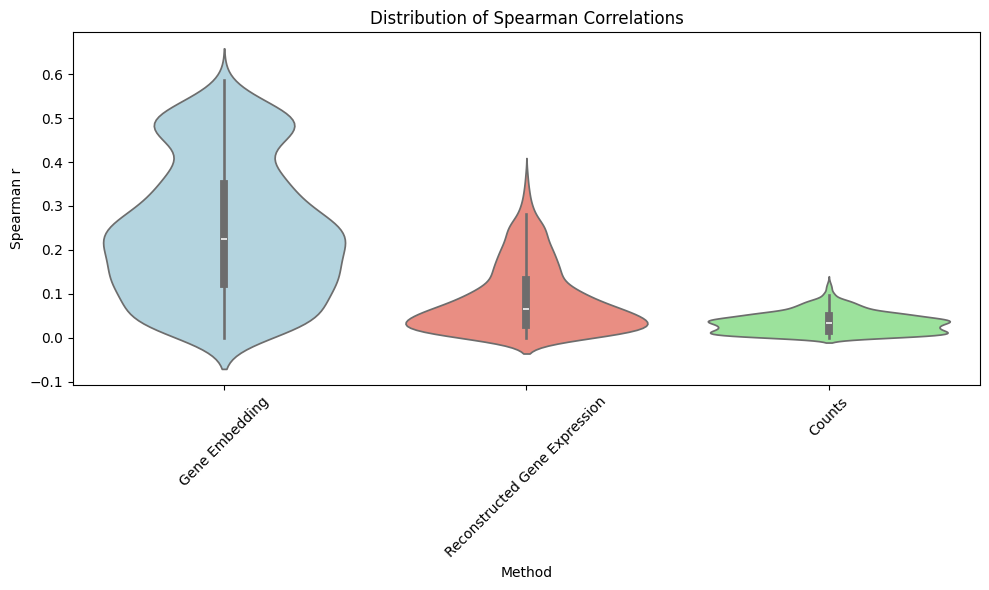

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata, spearmanr

def spearman_corr(matrix):
    ranked_matrix = np.apply_along_axis(rankdata, 1, matrix)
    return np.corrcoef(ranked_matrix)

def corr_analysis(corr, sim):
    sim_values = sim.values
    correlations = np.empty(sim.shape[0])
    for i in range(sim.shape[0]):
        correlations[i], _ = spearmanr(corr[i], sim_values[i])
    return np.abs(correlations)

def plot_corr_distributions(corr_matrices, names, sim):
    all_data = []

    for matrix, name in zip(corr_matrices, names):
        #corr = spearman_corr(matrix)
        corr = matrix.values @ matrix.T.values
        abs_corrs = corr_analysis(corr, sim)
        all_data.extend([(name, val) for val in abs_corrs])

    df = pd.DataFrame(all_data, columns=["Method","Correlation"])

    custom_palette = {
        names[0]: "lightblue",
        names[1]: "salmon",
        names[2]: "lightgreen"
    }

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Method", y="Correlation", data=df, palette=custom_palette)
    plt.title("Distribution of Spearman Correlations")
    plt.ylabel("Spearman r")
    plt.xlabel("Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_corr_distributions([row_embedding_df,out_features_df, node_features_df], names=["Gene Embedding","Reconstructed Gene Expression", "Counts"], sim=sim)

## **Propagation based signature projection for actvation of Tcells**



In [ ]:
scNET.run_signature(recon_obj, up_sig=["ZAP70", "LCK", "FYN", "CD3G", "CD28", "LAT"],alpha = 0.9)

KeyboardInterrupt: 

**And for Tumor aggression**

In [ ]:

scNET.run_signature(recon_obj,up_sig=["Cdkn2a","Myc","Pten","Kras"])


KeyboardInterrupt: 

**Creating the co-embedded network, is it modular?**

In [ ]:
import networkx as nx
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

##  Reconstract KEGG Pathways Example



### Re-embed the T-cells subset

In [ ]:
obj = sc.read_h5ad("./example.h5ad")
sub_obj = obj[obj.obs["Cell Type"] == "CD8 Tcells"]
scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=300, model_name = "Tcells")
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("Tcells")

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (9522, 753)


Training: 100%|██████████| 300/300 [20:27<00:00,  4.09s/it]

Best Network AUC: 0.8852655358249608


In [ ]:
from scNET import coEmbeddedNetwork  as cen
import pandas as pd
def run_pathway_recon_anaylsis(gene_embedding, ref, threshold=40):
    '''
    Predicts KEGG pathway memberships using gene embeddings and reference data, and evaluates the performance using AUPR.

    Args:
        gene_embedding (np.ndarray): The matrix of gene embeddings.
        ref (pd.DataFrame): A reference dataset containing gene expression or other relevant features.

    Returns:
        pd.DataFrame: A DataFrame containing the AUPR scores for predictions from the gene embeddings and reference data.

    Method:
        - Annotates genes with KEGG pathway memberships using `crate_kegg_annot`.
        - Filters KEGG pathways to include those with at least 40 gene members.
        - Constructs co-embedded networks from both the embeddings and reference data.
        - Uses propagation to predict pathway memberships for each graph.
        - Evaluates the predictions using AUPR and plots the results.
    '''
    ref.index = list(map(lambda x: x.upper(),ref.index))
    annot = cen.crate_kegg_annot(ref.index)
    annot_threshold = annot.sum()>=threshold
    annot_threshold = annot_threshold[annot_threshold == True].sort_values(ascending=False).head(50)
    graph_embedded,_ = cen.build_co_embeded_network(gene_embedding,ref)
    graph_ref,_ = cen.build_co_embeded_network(ref,ref)
    kegg_pred = [cen.make_term_predication([graph_embedded,graph_ref], annot[term]) for term in annot_threshold.index]

    kegg_pred = np.array(kegg_pred).squeeze()
    df = pd.DataFrame({"AUPR" : kegg_pred.T.reshape(-1), "Method": ["scNET" for i in range(kegg_pred.shape[0])]  +  ["Counts" for i in range(kegg_pred.shape[0])]})

    fig, ax = plt.subplots(figsize=[10,7])
    fig.set_dpi(600)

    custom_palette =  ['darkturquoise', 'lightsalmon']

    sns.boxenplot(ax=ax, data=df,x="Method", y="AUPR", palette=custom_palette)
    sns.set_theme(style='white',font_scale=1.5)
    plt.show()

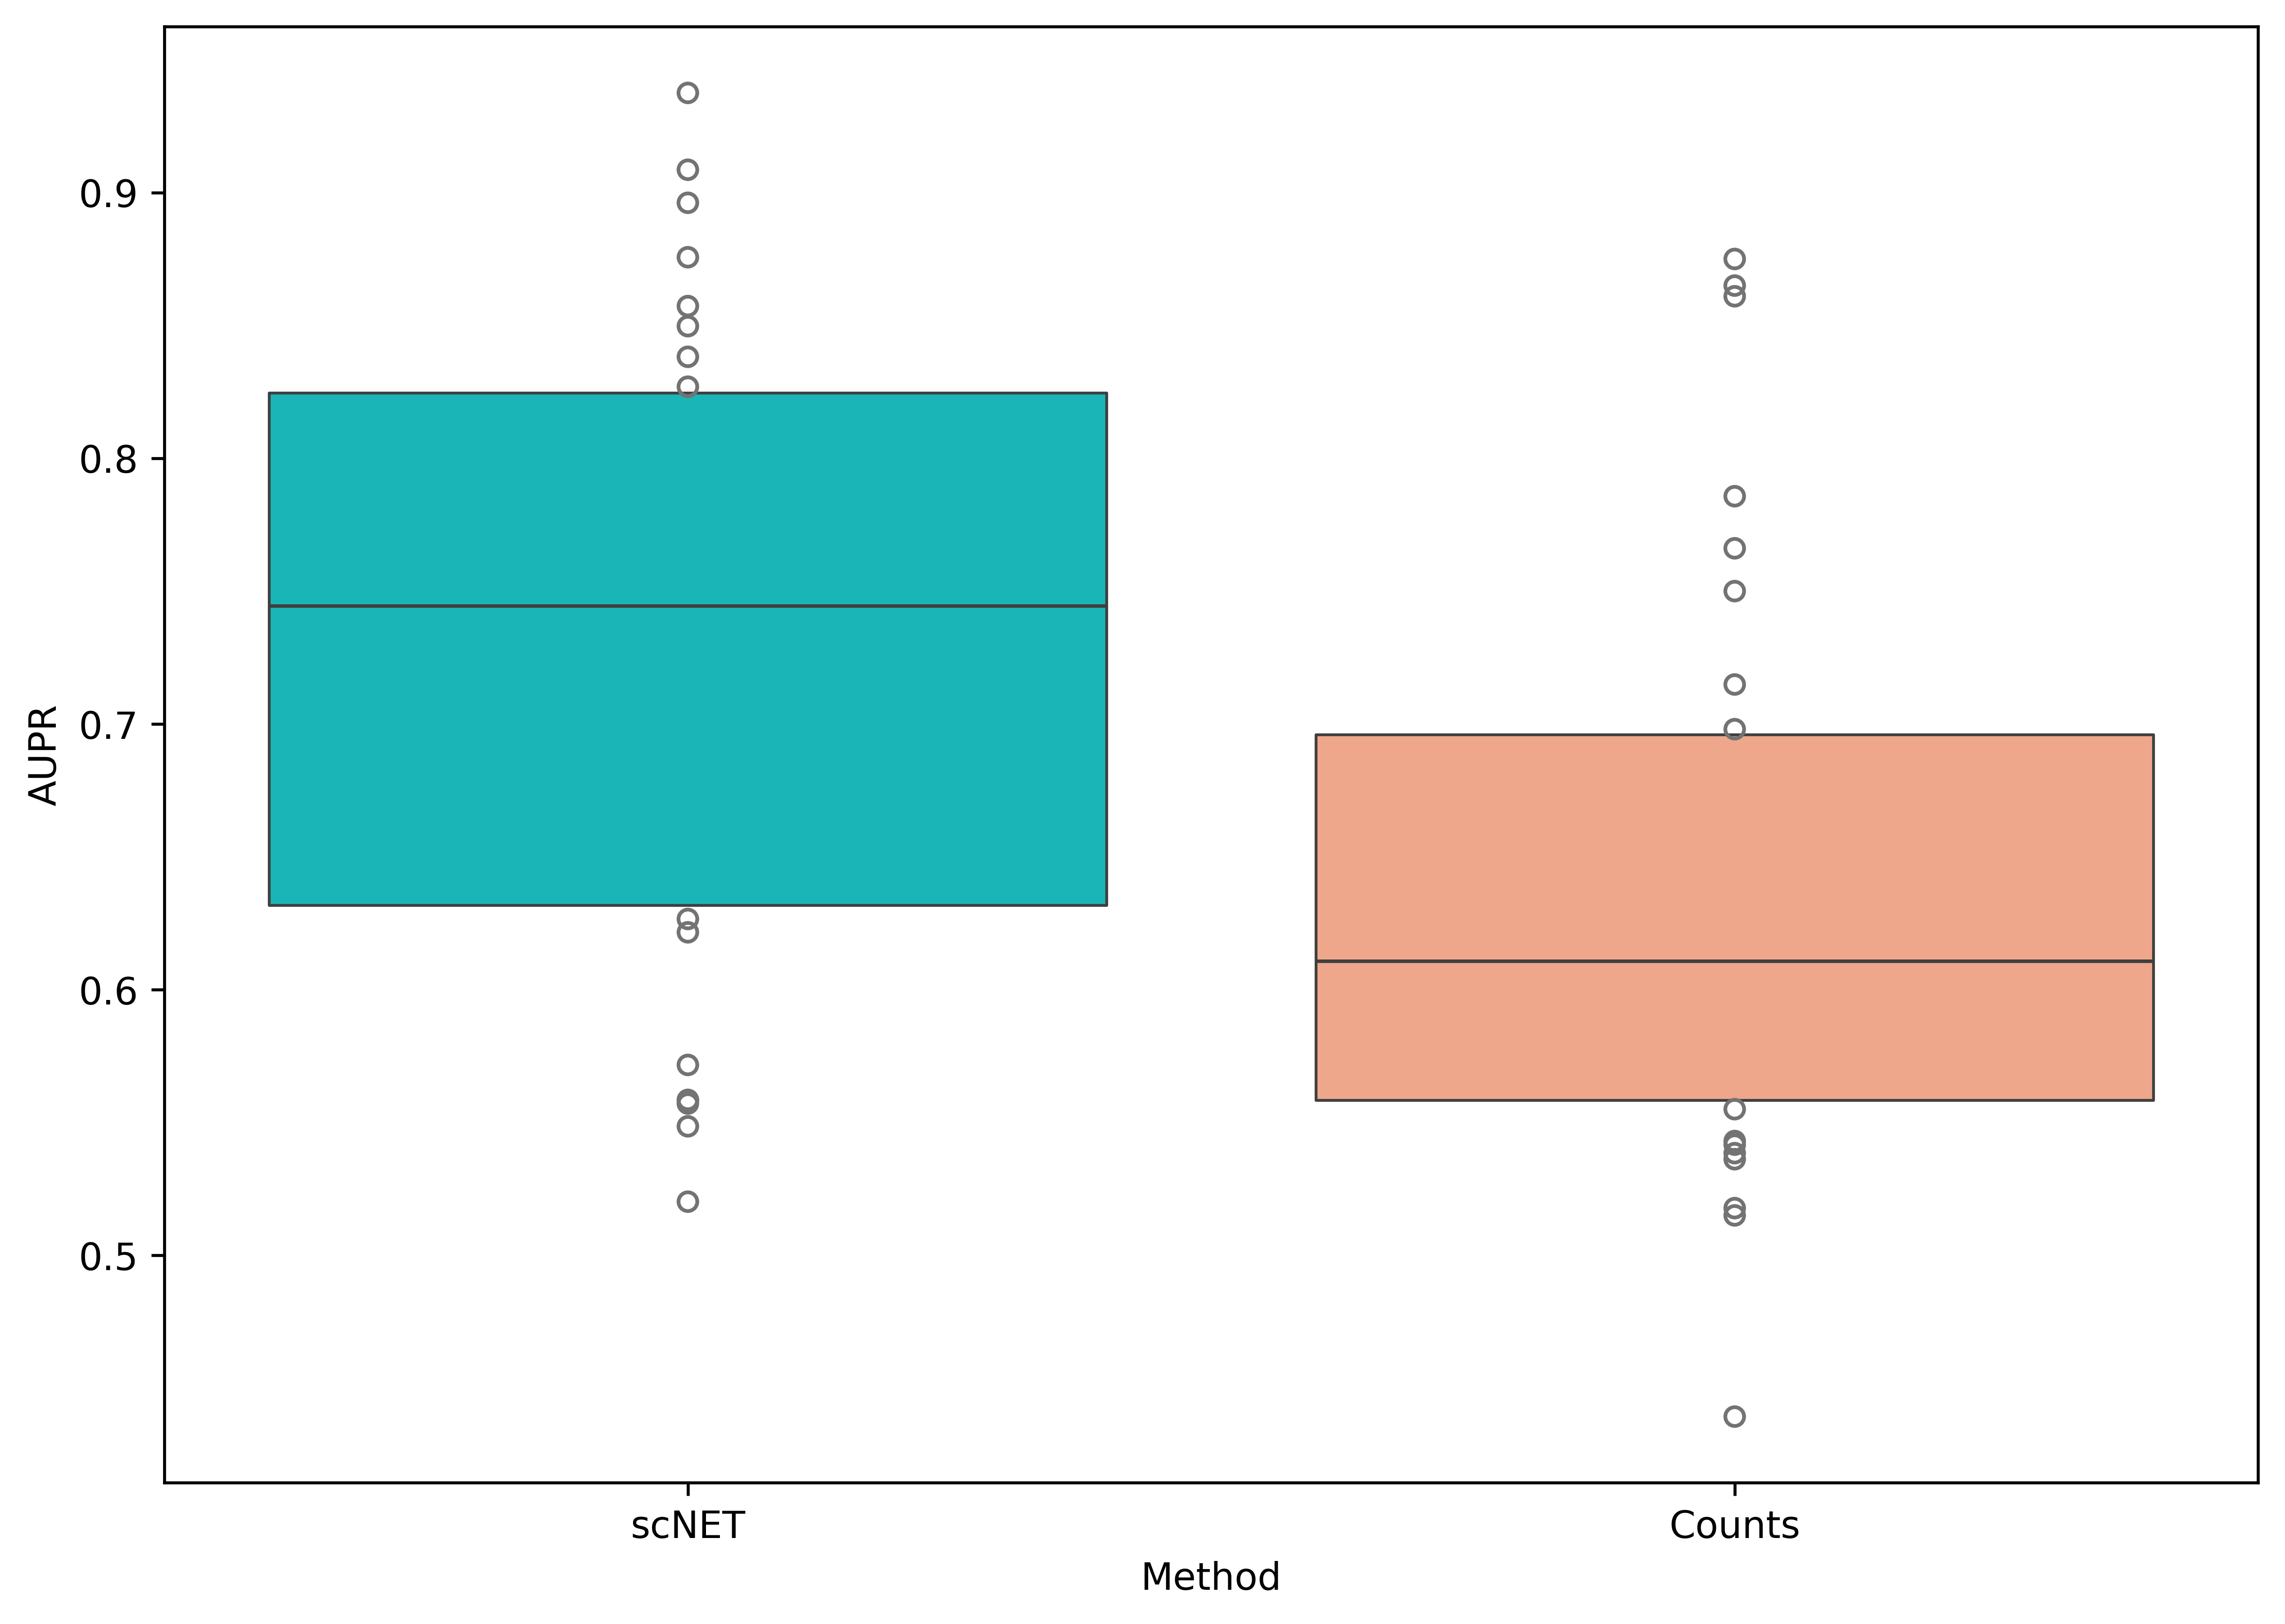

In [ ]:

run_pathway_recon_anaylsis(embedded_genes,node_features)

**Finding differential enriched pathways**
### Can we see a difference in phenotype between Cancer, Microglia and Macrophages?








In [ ]:
recon_obj.obs["Cell Type"] = recon_obj.obs.seurat_clusters.map(cell_types)
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(recon_obj.copy()[recon_obj.obs["Cell Type"].isin(["Microglia","Macrophages","Cancer"])],groupby="Cell Type")
scNET.plot_de_pathways(significant_pathways,enrichment_results,10)

AttributeError: 'DataFrame' object has no attribute 'seurat_clusters'

<Figure size 1000x3000 with 0 Axes>

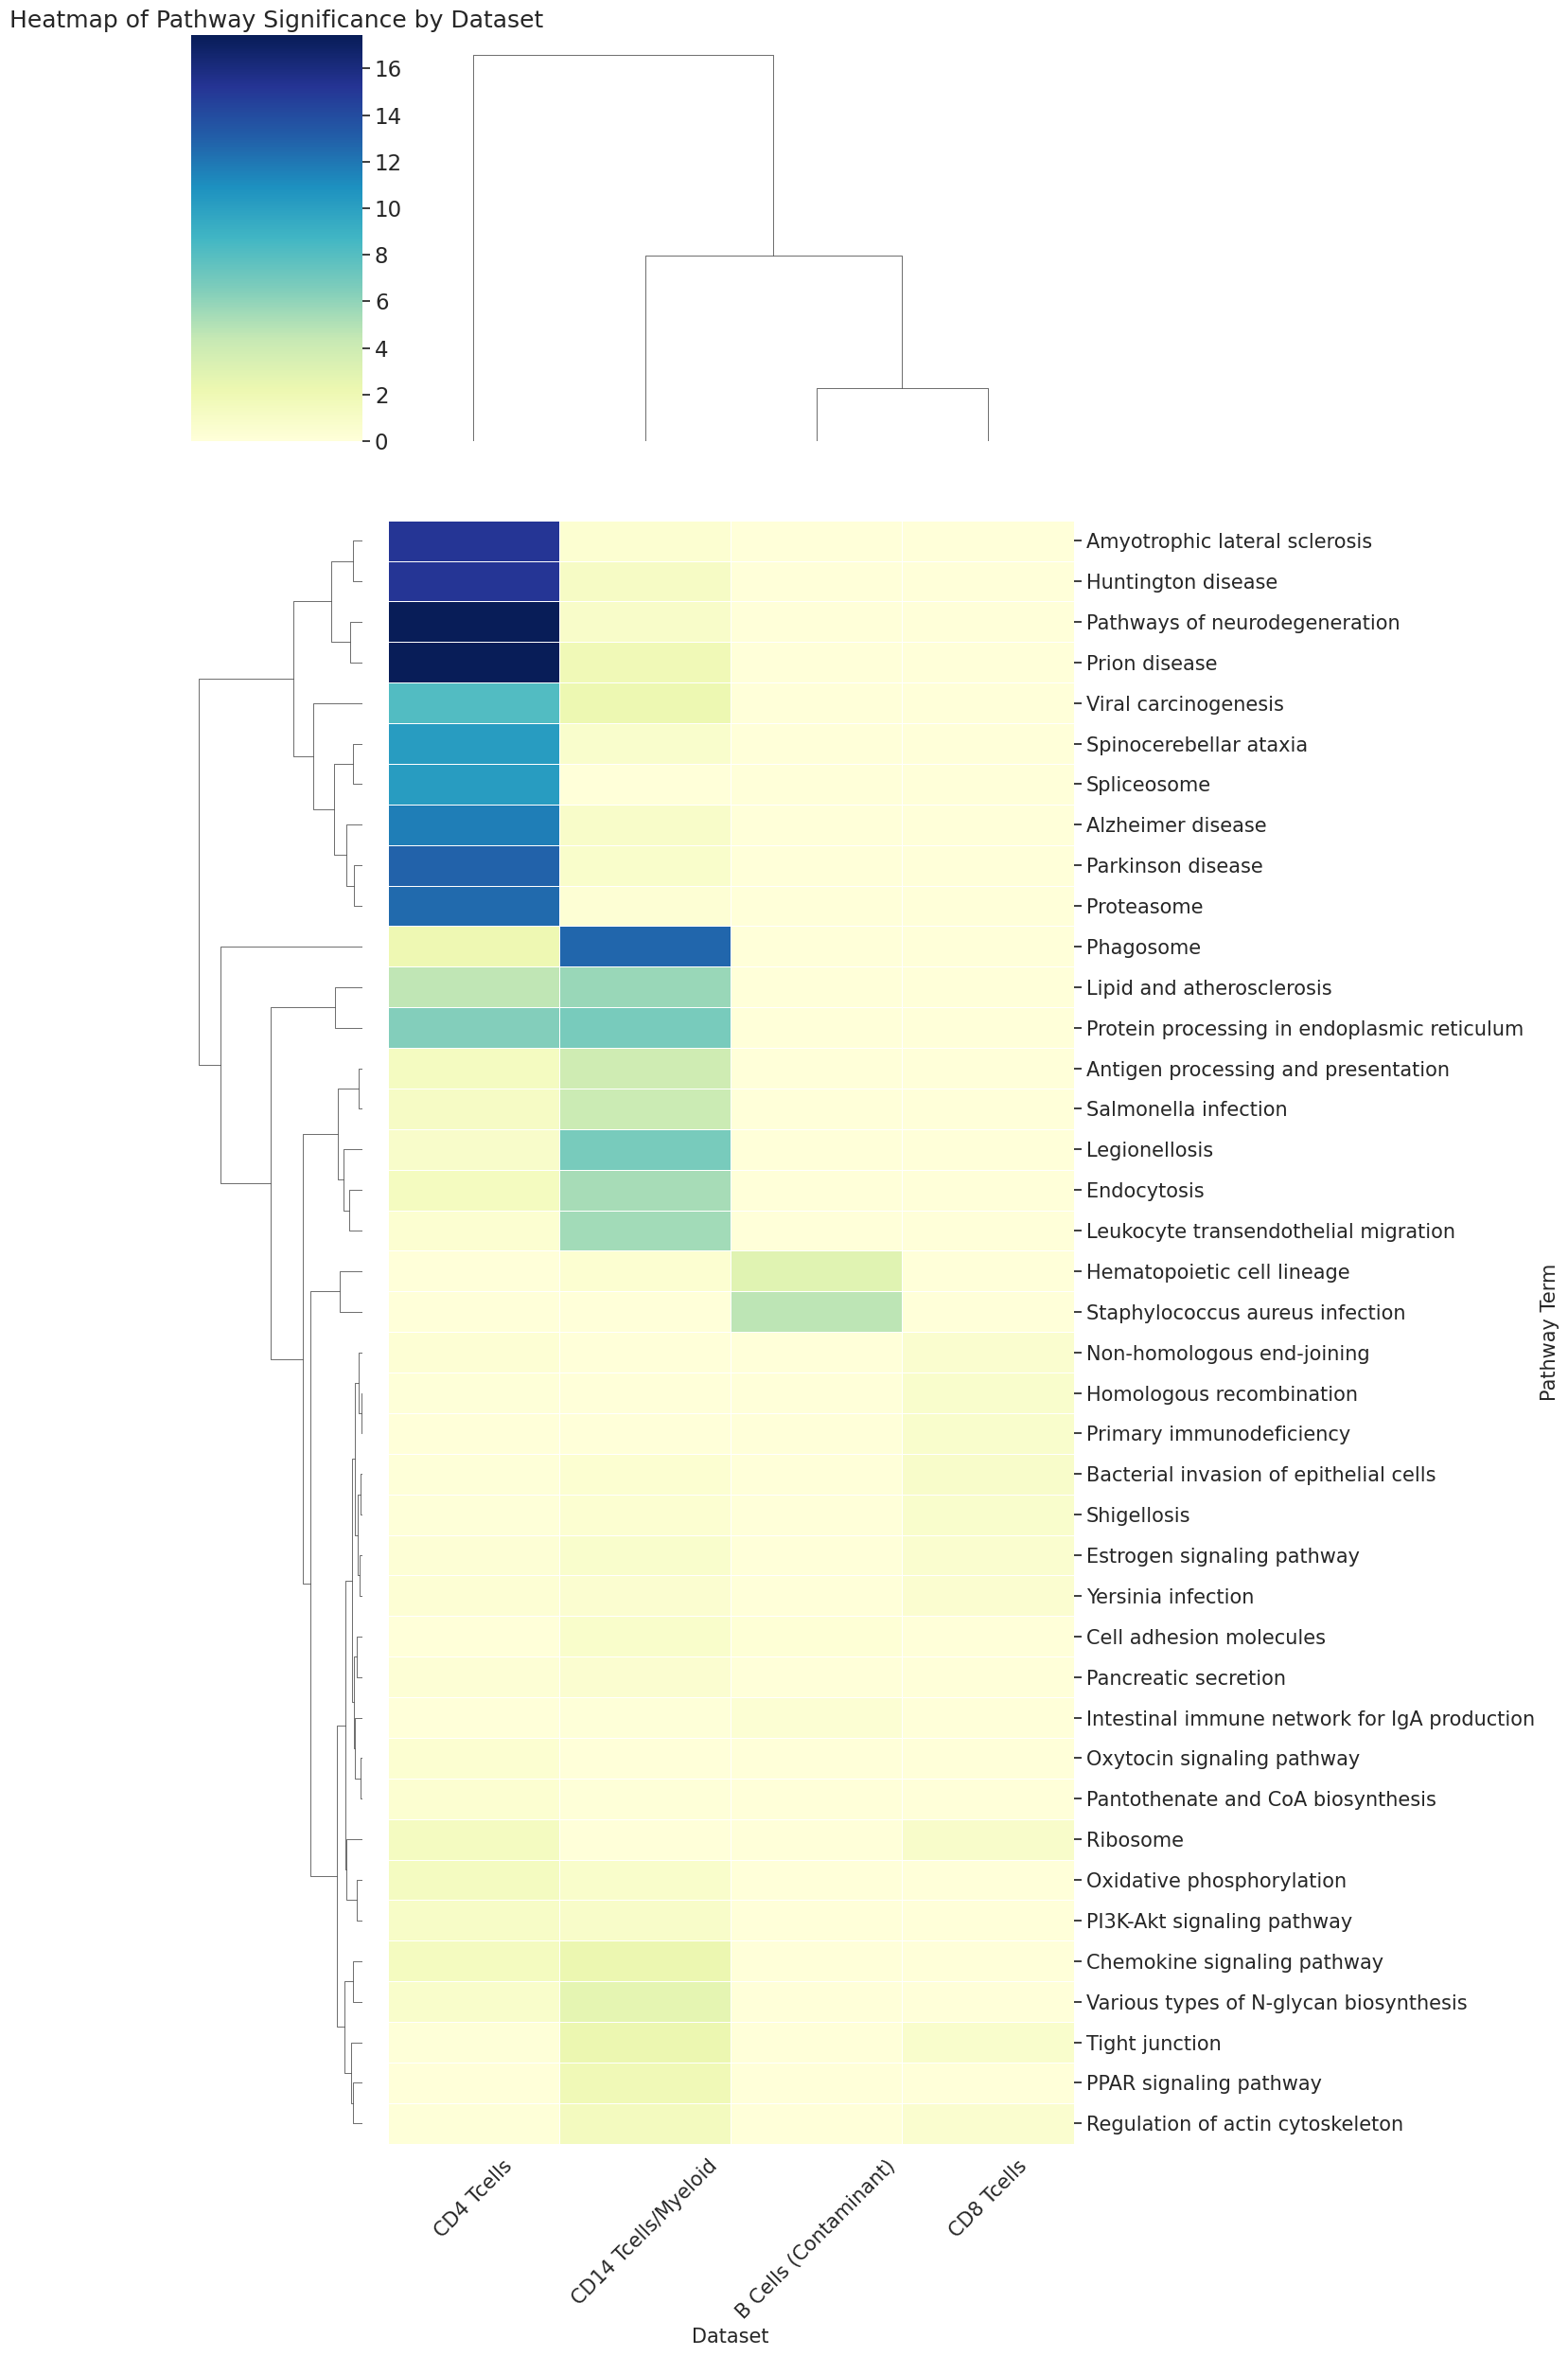

In [ ]:
# 包含所有四个已鉴定的细胞群
GROUPS_TO_COMPARE_ALL = [
    "CD8 Tcells",
    "CD4 Tcells",
    "B Cells (Contaminant)",
    "CD14 Tcells/Myeloid" # <--- 添加了第 4 组
]

# 重新运行分析
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(
    recon_obj.copy()[recon_obj.obs["Cell Type"].isin(GROUPS_TO_COMPARE_ALL)],
    groupby="Cell Type"
)

# 绘制结果
scNET.plot_de_pathways(
    significant_pathways,
    enrichment_results,
    10
)